In [40]:
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [48]:
df1 = pd.read_csv('C:/1차data/1-7기최종.csv', encoding="cp949",index_col=0)
df1

,고객번호,증감확인,성별,연령대,이용횟수,경쟁사이용횟수,멤버쉽보유,가구류cv,고급식료품cv,기호품cv,...,객단가증감지수,A제휴사(%),B제휴사(%),C제휴사(%),D제휴사(%),편의품(%),선매품(%),전문품(%),기타(%),RFM
0,1,0,2.154912,1.998566,-0.423501,3.785326,-0.703766,0.002439,0.469652,-0.572023,...,0.000111,0.390612,-0.420830,-0.004591,-0.285059,-0.637370,-0.815035,1.182401,-0.830928,7
1,2,0,2.154912,1.998566,-0.423501,1.829441,-0.703766,0.188818,-0.063812,-0.615197,...,0.000111,0.167687,-0.303073,-0.704472,1.315183,-0.521035,-0.557374,0.792623,-0.491442,7
2,3,1,2.154912,1.998566,-0.423501,-0.405857,-0.703766,-1.337367,-0.974824,2.049097,...,0.000111,0.813860,-0.720745,-0.435429,-0.285059,-0.458670,1.828343,-0.799093,-0.988326,6
3,4,1,-0.464056,1.998566,-0.423501,0.432380,-0.703766,0.159897,0.299710,-0.256348,...,0.000111,-0.529452,0.484433,0.550137,-0.285059,-0.029309,1.144128,-0.799093,-0.134056,8
4,6,1,-0.464056,1.998566,-0.423501,-0.405857,-0.703766,-0.032283,0.365633,-0.794449,...,-1.393780,-0.260879,-0.328832,1.215811,-0.285059,-0.392706,0.040430,0.295754,-0.471690,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18873,19333,0,-0.464056,-2.144283,-0.085040,-0.405857,1.420926,-1.337367,0.638489,-0.236681,...,-1.393780,-2.093917,-0.058970,-0.058214,7.319088,0.963737,0.242709,-0.799093,0.771446,7
18874,19334,0,2.154912,-1.108571,-0.423501,7.976510,1.420926,0.003426,0.946073,-0.663487,...,0.697056,-3.293192,3.374408,1.959146,-0.285059,1.231188,0.272560,-0.799093,0.586889,7
18875,19335,1,-0.464056,-1.108571,-0.423501,-0.405857,1.420926,2.159328,0.420607,0.035026,...,-0.696834,0.709267,-0.577228,-0.433580,-0.285059,0.920561,0.084813,-0.799093,1.041800,8
18876,19336,1,-0.464056,-1.108571,-0.423501,-0.405857,-0.703766,-0.265549,-0.974824,-1.012075,...,-0.696834,0.549718,-0.991833,-0.704472,1.706254,0.205760,-0.748656,0.865613,-0.715503,5


In [49]:
df2 = pd.read_csv('C:/1차data/1-8기최종.csv', encoding="cp949",index_col=0)
df2

,고객번호,증감확인,성별,연령대,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,A구매비율(%),B구매비율(%),C구매비율(%),...,가구류CV_S,레저취미CV_S,전자제품CV_S,도서음반CV_S,차량용품CV_S,분기증감율,분기변동율,객단가변동률,객단가증감률,RFM
0,1,0,2.156039,1.998229,3.784157,-0.652472,-0.424659,0.394618,-0.383396,-0.011062,...,0.736138,0.279975,0.588740,-0.624613,-0.783590,0.438791,-1.388013,0.075893,-0.670022,7
1,2,0,2.156039,1.998229,1.828781,-0.652472,-0.424659,0.222038,-0.316534,-0.797114,...,-0.123062,-1.159604,-0.158214,-0.624613,-0.783590,0.000000,-0.690965,0.705120,-0.670022,9
2,3,0,2.156039,1.998229,-0.405935,-0.652472,-0.424659,0.874281,-0.763673,-0.469683,...,-1.625508,-1.815644,1.170227,-0.624613,-0.783590,0.000000,-1.620363,-1.497173,0.000107,4
3,4,0,-0.463814,1.998229,0.432083,-0.652472,-0.424659,-0.849045,0.937127,0.654643,...,0.088640,0.268642,-1.264607,-0.624613,-0.783590,-0.877582,0.703133,0.075893,-0.670022,8
4,6,1,-0.463814,1.998229,-0.405935,-0.652472,-0.424659,-0.312020,-0.281013,1.376726,...,0.731873,1.163341,-1.264607,-0.624613,-0.783590,-0.877582,-1.155664,-0.238720,-1.340151,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,0,-0.463814,-2.144017,-0.405935,1.068660,-0.084953,-2.409681,-0.042818,0.282759,...,-1.625508,1.588049,-1.264607,-0.624613,-0.783590,0.000000,-1.155664,0.705120,-0.670022,4
18862,19334,0,2.156039,-1.108456,7.974248,1.068660,-0.424659,0.939555,-0.769245,-0.603041,...,0.181109,-0.557044,1.170227,0.637271,1.621021,0.438791,0.935482,1.334347,-2.010280,7
18863,19335,1,-0.463814,-1.108456,-0.405935,1.068660,-0.424659,0.754613,-0.602090,-0.458841,...,-0.684492,-0.032609,-1.264607,0.242607,0.707541,-0.877582,1.167832,0.075893,0.670236,9
18864,19336,1,-0.463814,-1.108456,-0.405935,-0.652472,-0.424659,-0.432677,0.692663,-0.797114,...,1.303824,-1.815644,-1.264607,-0.624613,-0.783590,-3.510330,0.703133,0.075893,-0.670022,5


<AxesSubplot:>

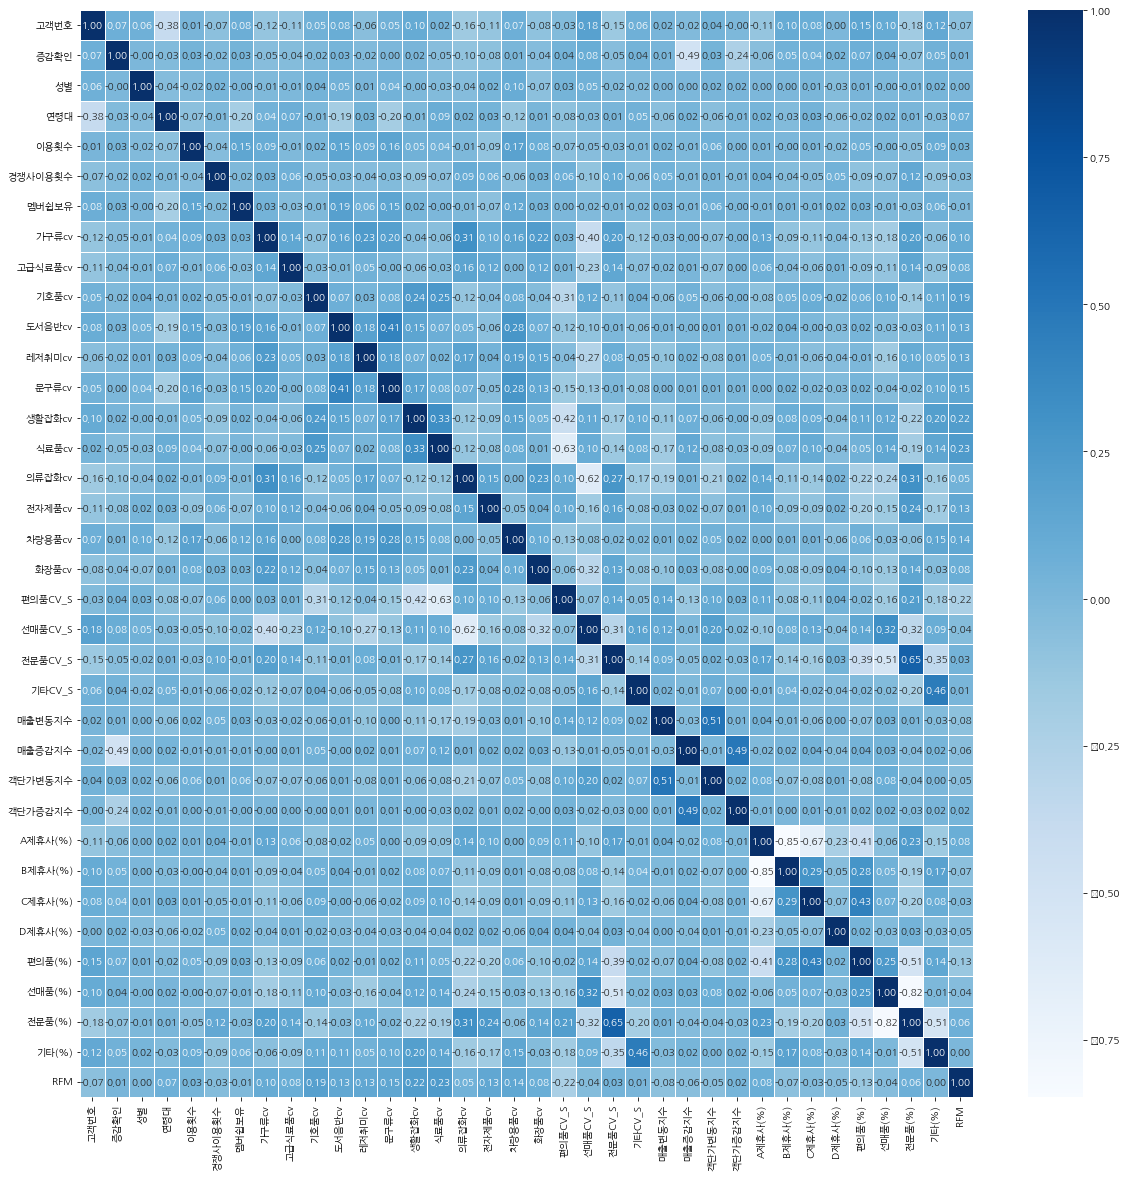

In [50]:
plt.figure(figsize=(20,20))
sns.heatmap(data =df1.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [51]:
# plt.figure(figsize=(20,20))
# sns.heatmap(data =df2.corr(), annot=True, 
# fmt = '.2f', linewidths=.5, cmap='Blues')

In [52]:
X_train=df1.drop(['고객번호','증감확인'],axis=1)

y_train=df1[['증감확인']]

X_test=df2.drop(['고객번호','증감확인'],axis=1)

y_test=df2[['증감확인']]


In [53]:
rf_clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rf_clf.fit(X_train,y_train)
# pred = rf_clf.predict(X_test)
# accuracy = accuracy_score(y_test,pred)





# params = {
#     'n_estimators':[10,50,100],
#     'max_depth' : [6,8,10,12],
#    'min_samples_leaf' : [8,12,18],
#     'min_samples_split' : [8,14,20]
# }
# grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)
# grid_cv.fit(X_train,y_train)

# print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
# print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))
print(accuracy_score(y_train,rf_clf.predict(X_train)))
print(accuracy_score(y_test,rf_clf.predict(X_test)))

1.0
0.45950386939467824


In [54]:
lgbm = LGBMClassifier(n_estimators=400)
evals = [(X_test,y_test)]
lgbm.fit(X_train, y_train, eval_set=evals,verbose=False)

print(accuracy_score(y_train,lgbm.predict(X_train)))
print(accuracy_score(y_test,lgbm.predict(X_test)))

0.9476639474520606
0.45552846390331814
